In [2]:
import pandas as pd
import matplotlib.pyplot as plt  # 그래프 그리는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn import metrics  # 평가를 위한 라이브러리
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import seaborn as sns  # 시각화 라이브러리

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [3]:
train = pd.read_csv('smhrd111/train.csv', index_col = 'ID')
test = pd.read_csv('smhrd111/test.csv', index_col = 'ID')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          516 non-null    float64
 1   event         699 non-null    int64  
 2   gender        699 non-null    object 
 3   age           699 non-null    float64
 4   industry      672 non-null    object 
 5   profession    699 non-null    object 
 6   traffic       699 non-null    object 
 7   coach         699 non-null    object 
 8   head_gender   699 non-null    object 
 9   greywage      679 non-null    object 
 10  way           678 non-null    object 
 11  extraversion  699 non-null    float64
 12  independ      699 non-null    float64
 13  selfcontrol   666 non-null    float64
 14  anxiety       699 non-null    float64
 15  novator       699 non-null    float64
dtypes: float64(7), int64(1), object(8)
memory usage: 92.8+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 700 to 1129
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          321 non-null    float64
 1   gender        430 non-null    object 
 2   age           430 non-null    float64
 3   industry      430 non-null    object 
 4   profession    430 non-null    object 
 5   traffic       430 non-null    object 
 6   coach         430 non-null    object 
 7   head_gender   360 non-null    object 
 8   greywage      430 non-null    object 
 9   way           430 non-null    object 
 10  extraversion  430 non-null    float64
 11  independ      430 non-null    float64
 12  selfcontrol   385 non-null    float64
 13  anxiety       430 non-null    float64
 14  novator       430 non-null    float64
dtypes: float64(7), object(8)
memory usage: 53.8+ KB


In [6]:
train.corr()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator
stag,1.000000,-0.070421,-0.214415,-0.078248,-0.013056,0.102294,0.042807,-0.039662
event,-0.070421,1.000000,0.008723,0.013961,-0.007915,-0.049588,-0.022668,0.022554
age,-0.214415,0.008723,1.000000,-0.169429,0.074582,0.032276,0.060051,0.020334
extraversion,-0.078248,0.013961,-0.169429,1.000000,-0.208904,-0.512422,-0.150632,0.287073
independ,-0.013056,-0.007915,0.074582,-0.208904,1.000000,-0.202594,-0.418896,0.038421
selfcontrol,0.102294,-0.049588,0.032276,-0.512422,-0.202594,1.000000,-0.074452,-0.573815
anxiety,0.042807,-0.022668,0.060051,-0.150632,-0.418896,-0.074452,1.000000,0.255866
novator,-0.039662,0.022554,0.020334,0.287073,0.038421,-0.573815,0.255866,1.000000


In [7]:
pd.set_option('display.max_row', 500)
pt1 = train.pivot_table(values = 'stag', index = ['coach', 'gender'], aggfunc = 'mean')
pt1

stag
coach   gender           
my head f       37.592777
        m       35.997760
no      f       33.495768
        m       46.687709
yes     f       38.830323
        m       31.132101

### 나이 결측치 채우기 (coach 와 성별 기준)

In [8]:
def fill_stag(df):
    # 만약 나이가 결측치라면 피봇테이블에서 값을 가져와서 채운다.
    if np.isnan(df['stag']): # 결측치이면 true, 아니면 false
        return pt1.loc[df['coach'],df['gender']]
    # 만약 나이가 결측치가 아니라면 원래 나이값을 사용하자
    else:
        return df['stag']

In [9]:
train['stag'] = train.apply(fill_stag, axis = 1).astype('float64')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          699 non-null    float64
 1   event         699 non-null    int64  
 2   gender        699 non-null    object 
 3   age           699 non-null    float64
 4   industry      672 non-null    object 
 5   profession    699 non-null    object 
 6   traffic       699 non-null    object 
 7   coach         699 non-null    object 
 8   head_gender   699 non-null    object 
 9   greywage      679 non-null    object 
 10  way           678 non-null    object 
 11  extraversion  699 non-null    float64
 12  independ      699 non-null    float64
 13  selfcontrol   666 non-null    float64
 14  anxiety       699 non-null    float64
 15  novator       699 non-null    float64
dtypes: float64(7), int64(1), object(8)
memory usage: 92.8+ KB


In [11]:
test['stag'] = test.apply(fill_stag, axis = 1).astype('float64')

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 700 to 1129
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          430 non-null    float64
 1   gender        430 non-null    object 
 2   age           430 non-null    float64
 3   industry      430 non-null    object 
 4   profession    430 non-null    object 
 5   traffic       430 non-null    object 
 6   coach         430 non-null    object 
 7   head_gender   360 non-null    object 
 8   greywage      430 non-null    object 
 9   way           430 non-null    object 
 10  extraversion  430 non-null    float64
 11  independ      430 non-null    float64
 12  selfcontrol   385 non-null    float64
 13  anxiety       430 non-null    float64
 14  novator       430 non-null    float64
dtypes: float64(7), object(8)
memory usage: 53.8+ KB


### train 결측치 채우기 (제일 빈도수 많은 값으로)

In [13]:
train['industry'].value_counts()

Retail             171
manufacture         80
Banks               79
etc                 63
Consult             44
IT                  44
State               40
Building            32
transport           26
Telecom             21
PowerGeneration     19
Pharma              16
Agriculture         11
Mining              10
 HoReCa              8
RealEstate           8
Name: industry, dtype: int64

In [14]:
train['industry'] = train['industry'].fillna('Retail')

In [15]:
train['greywage'].value_counts()

white    602
grey      77
Name: greywage, dtype: int64

In [16]:
train['greywage'] = train['greywage'].fillna('white')

In [17]:
train['way'].value_counts()

bus     415
car     189
foot     74
Name: way, dtype: int64

In [18]:
train['way'] = train['way'].fillna('bus')

In [19]:
train['selfcontrol'].value_counts()

5.7     103
4.1      94
4.9      93
6.4      77
7.2      76
8.0      55
3.3      51
2.6      44
8.7      28
9.5      17
1.8      15
10.0      7
1.0       6
Name: selfcontrol, dtype: int64

In [20]:
train['selfcontrol'] = train['selfcontrol'].fillna(5.7)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          699 non-null    float64
 1   event         699 non-null    int64  
 2   gender        699 non-null    object 
 3   age           699 non-null    float64
 4   industry      699 non-null    object 
 5   profession    699 non-null    object 
 6   traffic       699 non-null    object 
 7   coach         699 non-null    object 
 8   head_gender   699 non-null    object 
 9   greywage      699 non-null    object 
 10  way           699 non-null    object 
 11  extraversion  699 non-null    float64
 12  independ      699 non-null    float64
 13  selfcontrol   699 non-null    float64
 14  anxiety       699 non-null    float64
 15  novator       699 non-null    float64
dtypes: float64(7), int64(1), object(8)
memory usage: 92.8+ KB


### test 결측치 채우기(제일 빈도수 많은 값으로)

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 700 to 1129
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          430 non-null    float64
 1   gender        430 non-null    object 
 2   age           430 non-null    float64
 3   industry      430 non-null    object 
 4   profession    430 non-null    object 
 5   traffic       430 non-null    object 
 6   coach         430 non-null    object 
 7   head_gender   360 non-null    object 
 8   greywage      430 non-null    object 
 9   way           430 non-null    object 
 10  extraversion  430 non-null    float64
 11  independ      430 non-null    float64
 12  selfcontrol   385 non-null    float64
 13  anxiety       430 non-null    float64
 14  novator       430 non-null    float64
dtypes: float64(7), object(8)
memory usage: 53.8+ KB


In [23]:
test['selfcontrol'].value_counts()

6.4     63
4.1     51
7.2     45
5.7     43
4.9     39
3.3     34
8.0     28
8.7     27
2.6     26
9.5     12
1.8      9
10.0     5
1.0      3
Name: selfcontrol, dtype: int64

In [24]:
test['selfcontrol'] = test['selfcontrol'].fillna(6.4)

#### head_gender 일단 제일 많은 값으로 채워넣기

In [25]:
test['head_gender'].value_counts()

m    205
f    155
Name: head_gender, dtype: int64

In [26]:
test['head_gender'] = test['head_gender'].fillna('m')

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 700 to 1129
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          430 non-null    float64
 1   gender        430 non-null    object 
 2   age           430 non-null    float64
 3   industry      430 non-null    object 
 4   profession    430 non-null    object 
 5   traffic       430 non-null    object 
 6   coach         430 non-null    object 
 7   head_gender   430 non-null    object 
 8   greywage      430 non-null    object 
 9   way           430 non-null    object 
 10  extraversion  430 non-null    float64
 11  independ      430 non-null    float64
 12  selfcontrol   430 non-null    float64
 13  anxiety       430 non-null    float64
 14  novator       430 non-null    float64
dtypes: float64(7), object(8)
memory usage: 53.8+ KB


### train 데이터 탐색

In [28]:
train_greywage = train[['greywage','event','stag']].groupby(['greywage','event']).count()
train_greywage

stag
greywage event      
grey     0        24
         1        53
white    0       221
         1       401

- greywage 가 white인 사람이 많이 이직함

In [29]:
train_way = train[['way','event','stag']].groupby(['way','event']).count()
train_way

stag
way  event      
bus  0       144
     1       292
car  0        61
     1       128
foot 0        40
     1        34

- way가 bus, car 인 사람이 많이 이직함

In [30]:
train_head_gender = train[['head_gender','event','stag']].groupby(['head_gender','event']).count()
train_head_gender

stag
head_gender event      
f           0       148
            1       219
m           0        97
            1       235

<AxesSubplot:xlabel='gender', ylabel='count'>

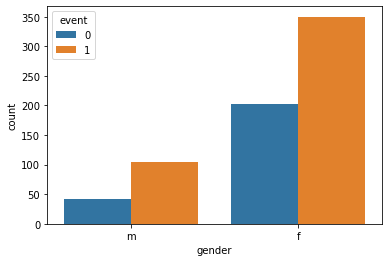

In [31]:
sns.countplot(data=train, x='gender', hue = 'event')

<AxesSubplot:xlabel='head_gender', ylabel='count'>

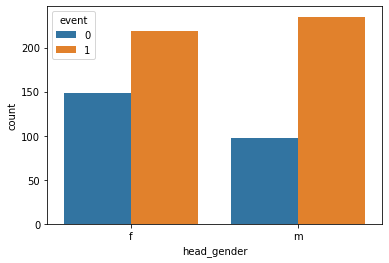

In [32]:
sns.countplot(data=train, x='head_gender', hue = 'event')

<AxesSubplot:xlabel='industry', ylabel='count'>

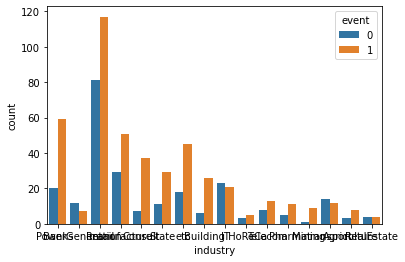

In [33]:
sns.countplot(data=train, x='industry', hue = 'event')

<AxesSubplot:xlabel='way', ylabel='count'>

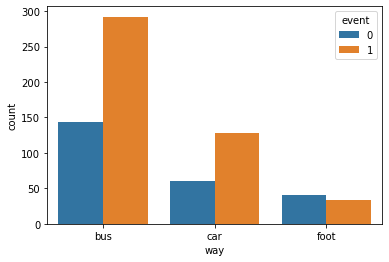

In [34]:
sns.countplot(data=train, x='way', hue = 'event')

<AxesSubplot:xlabel='greywage', ylabel='count'>

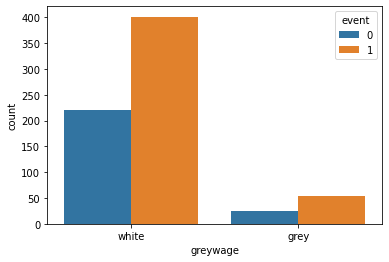

In [35]:
sns.countplot(data=train, x='greywage', hue = 'event')

<AxesSubplot:xlabel='coach', ylabel='count'>

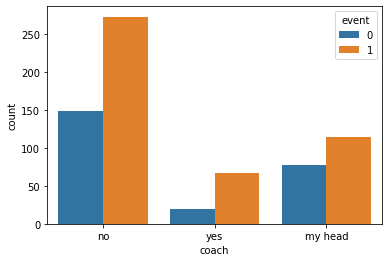

In [36]:
sns.countplot(data=train, x='coach', hue = 'event')

<AxesSubplot:xlabel='extraversion', ylabel='count'>

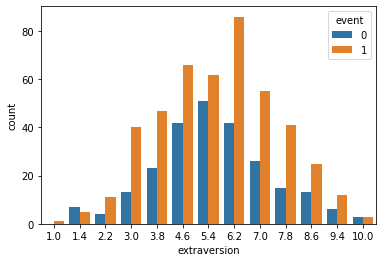

In [37]:
sns.countplot(data=train, x='extraversion', hue = 'event')

<AxesSubplot:xlabel='independ', ylabel='count'>

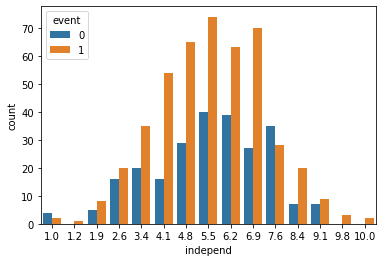

In [38]:
sns.countplot(data=train, x='independ', hue = 'event')

<AxesSubplot:xlabel='selfcontrol', ylabel='count'>

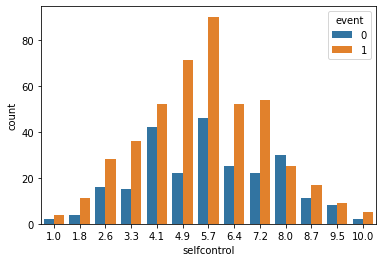

In [39]:
sns.countplot(data=train, x='selfcontrol', hue = 'event')

<AxesSubplot:xlabel='anxiety', ylabel='count'>

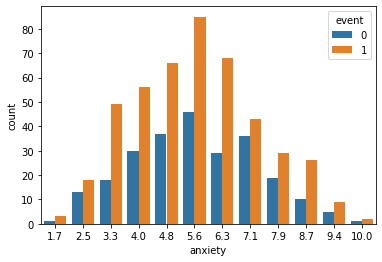

In [40]:
sns.countplot(data=train, x='anxiety', hue = 'event')

<AxesSubplot:xlabel='novator', ylabel='count'>

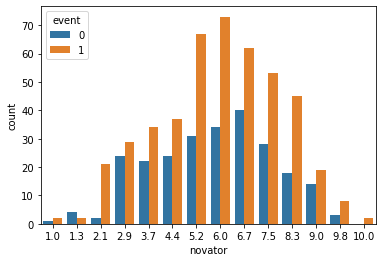

In [41]:
sns.countplot(data=train, x='novator', hue = 'event')

### 인코딩

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          699 non-null    float64
 1   event         699 non-null    int64  
 2   gender        699 non-null    object 
 3   age           699 non-null    float64
 4   industry      699 non-null    object 
 5   profession    699 non-null    object 
 6   traffic       699 non-null    object 
 7   coach         699 non-null    object 
 8   head_gender   699 non-null    object 
 9   greywage      699 non-null    object 
 10  way           699 non-null    object 
 11  extraversion  699 non-null    float64
 12  independ      699 non-null    float64
 13  selfcontrol   699 non-null    float64
 14  anxiety       699 non-null    float64
 15  novator       699 non-null    float64
dtypes: float64(7), int64(1), object(8)
memory usage: 112.8+ KB


In [43]:
y_train = train['event']
X_train = train.drop('event', axis = 1)
X_test = test

In [44]:
X_train.shape

(699, 15)

In [45]:
y_train.shape

(699,)

In [46]:
cat_feature = ['gender', 'industry', 'profession', 'traffic', 'coach', 'head_gender', 'greywage', 'way']

In [47]:
for i in cat_feature:
    dummy = pd.get_dummies(train[i], prefix = i)
    X_train = pd.concat([X_train, dummy], axis = 1)
    X_train.drop(i, axis=1, inplace = True)

In [48]:
for i in cat_feature:
    dummy = pd.get_dummies(test[i], prefix = i)
    X_test = pd.concat([X_test, dummy], axis = 1)
    X_test.drop(i, axis=1, inplace = True)

In [49]:
type(X_train.columns)

pandas.core.indexes.base.Index

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   stag                            699 non-null    float64
 1   age                             699 non-null    float64
 2   extraversion                    699 non-null    float64
 3   independ                        699 non-null    float64
 4   selfcontrol                     699 non-null    float64
 5   anxiety                         699 non-null    float64
 6   novator                         699 non-null    float64
 7   gender_f                        699 non-null    uint8  
 8   gender_m                        699 non-null    uint8  
 9   industry_ HoReCa                699 non-null    uint8  
 10  industry_Agriculture            699 non-null    uint8  
 11  industry_Banks                  699 non-null    uint8  
 12  industry_Building               699 

In [51]:
set(X_train.columns) - set(X_test.columns)

set()

In [52]:
knn_model = KNeighborsClassifier(n_neighbors = 10)

In [53]:
result = cross_val_score(knn_model,
                        X_train,
                        y_train,
                        cv = 10)
result

array([0.57142857, 0.54285714, 0.64285714, 0.64285714, 0.58571429,
       0.57142857, 0.64285714, 0.48571429, 0.58571429, 0.60869565])

In [54]:
result.mean()

0.5880124223602484

In [55]:
result = pd.read_csv('smhrd111/submission.csv')

In [56]:
knn_model.fit(X_train, y_train)
pre = knn_model.predict(X_test)

In [57]:
result['event'] = pre

In [58]:
result.to_csv('smhrd111/submission.csv', index = False)

### 트리모델

In [59]:
tree_model = DecisionTreeClassifier(max_depth = 10)

In [60]:
result = cross_val_score(tree_model,
                        X_train,
                        y_train,
                        cv = 10)
result

array([0.62857143, 0.57142857, 0.58571429, 0.61428571, 0.68571429,
       0.58571429, 0.64285714, 0.54285714, 0.51428571, 0.57971014])

In [61]:
result.mean()

0.5951138716356108